In [1]:
import folium
import importlib

import SaveEcoBotFinder
import IdMatcher
import CamsWrapper

importlib.reload(SaveEcoBotFinder)
importlib.reload(IdMatcher)
importlib.reload(CamsWrapper)

from SaveEcoBotFinder import SaveEcoBotFinder
from IdMatcher import IdMatcher
from CamsWrapper import CamsWrapper

In [24]:
MATCHER = IdMatcher("співставлення ID постів з ID Cams.csv")
FINDER = SaveEcoBotFinder("/media/osamoile/data/Ecobot_16_11_2020")
m = folium.Map(location=[50.41671, 30.618716], zoom_start=12)

for id in MATCHER.byCamsId(6564):
    print(id)

    post = FINDER.getById(id)
    if post:
        value = post.getValue("2020-10-13", 12) # row №7822
        print(value)
        coord = MATCHER.getCoordinates(id)

        if value:
            folium.Circle(location=coord,
                          radius=10 * abs(value - 28.9),
                          popup=value).add_to(m)
        else:
            folium.Marker(coord,
                          icon=folium.Icon(color='red', icon='info-sign'),
                          popup=value).add_to(m)

m

43
18.65
968
15.35
1069
0
1105
0
1107
0
1115
0
1126
0
1127
0
1128
10.22
1193
21.0
1353
32.0
1415
0
1544
0
2762
0
2781
31.7
2809
0
3070
30.19
3231
11.94
3401
0
3497
3504
31.75
3572
0
3620
31.6
3658
35.47
3678
15.92
3684
9.19
3685
8.54
4139
24.61
4211
14.72
12905
12914
12925
12931
12932
12933
12954
12991
13368
26.06
13422
33.2105
13455
40.2273
13803
0
13811
0


In [2]:
MATCHER = IdMatcher("співставлення ID постів з ID Cams.csv")
FINDER = SaveEcoBotFinder("/media/osamoile/data/Ecobot_16_11_2020")

def get_list_of_lists(date):
    lst = []
    for i in range(0, 24):
        lst.append([])

    # lst[x] - values for x:00

    for id in MATCHER.byCamsId(6564):
        post = FINDER.getById(id)
        if post:
            for i in range(0, 24):
                value = post.getValue(date, i)
                lst[i].append(value)
        print(str(id) + " done.")

    return lst


In [37]:
for i in lst:
    print(lst)

[[18.12, 21.93, 0, 0, 0, 0, 0, 0, 11.11, 27.0, 42.94, 0, 0, 0, 31.0, 0, 37.44, 20.8, 0, 97.12, 0, 0, 43.66, 21.0, 0, 47.36, 14.79, 33.78, 29.69, 44.7778, 45.0, 0, 0], [18.37, 24.23, 0, 0, 0, 0, 0, 0, 13.96, 27.0, 41.31, 0, 0, 0, 30.6, 0, 36.38, 41.19, 0, 77.0, 0, 0, 42.15, 21.76, 0, 39.73, 14.49, 35.64, 24.87, 43.0, 49.0, 0, 0], [18.9, 20.9, 0, 0, 0, 0, 0, 0, 14.0, 26.0, 38.73, 0, 0, 0, 30.1, 0, 37.25, 34.5, 0, 68.62, 0, 0, 38.96, 13.89, 17.52, 41.66, 12.95, 30.64, 24.94, 44.3333, 45.4545, 0, 0], [16.23, 23.35, 0, 0, 0, 0, 0, 0, 13.88, 25.0, 38.75, 0, 0, 0, 27.5, 0, 34.63, 29.0, 0, 52.88, 0, 0, 40.48, 15.02, 16.11, 26.39, 11.43, 25.45, 21.62, 42.85, 44.0, 0, 0], [15.25, 21.97, 0, 0, 0, 0, 0, 0, 12.64, 24.0, 35.25, 0, 0, 0, 27.9, 0, 34.56, 25.19, 0, 36.88, 0, 0, 39.61, 12.54, 10.91, 12.84, 10.7, 22.36, 19.87, 42.0, 40.925, 0, 0], [15.05, 21.23, 0, 0, 0, 0, 0, 0, 13.09, 23.0, 32.69, 0, 0, 0, 26.4, 0, 26.19, 27.13, 0, 34.88, 0, 0, 36.11, 8.97, 7.76, 9.84, 8.64, 21.05, 17.44, 38.5625, 39.5

In [6]:
averages = []

for i in range(0, 24):
    tmp = [x for x in lst[i] if x != 0]
    avg = sum(tmp) / len(tmp)
    print(len(tmp))
    averages.append(avg)

averages

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


[23.069999999999997,
 24.310000000000002,
 20.02,
 20.78666666666667,
 24.095,
 23.564999999999998,
 22.525000000000002,
 24.200000000000003,
 28.52166666666666,
 26.461666666666662,
 12.325000000000001,
 15.818333333333335,
 12.968333333333334,
 10.450000000000001,
 10.203333333333333,
 13.299999999999999,
 9.861666666666666,
 8.655,
 13.155,
 19.49,
 29.666666666666668,
 39.370000000000005,
 42.175,
 45.13333333333333]

In [3]:
import pandas as pd

CAMS = CamsWrapper("Cams_2019_2020_pm2.5_Kyiv.csv")

def get_averages(list_of_lists):
    averages = []
    for i in range(0, 24):
        tmp = [x for x in list_of_lists[i] if x != 0]
        avg = sum(tmp) / len(tmp)
        averages.append(avg)
    return averages

def get_lens(list_of_lists):
    lens = []
    for i in range(0, 24):
        tmp = [x for x in list_of_lists[i] if x != 0]
        lens.append(len(tmp))
    return lens


def process_date(date):
# date = "2020-03-25"
    cams = []
    dates = []
    hours = []
    for i in range(0, 24):
        cams.append(CAMS.filter(date, 6564, i))
        dates.append(date)
        hours.append(i)

    land_all = get_list_of_lists(date)
    land = get_averages(land_all)
    lens = get_lens(land_all)

    df = pd.DataFrame({"date": dates, "hour": hours, "cams": cams, "land": land, "len": lens})
    # print(df)
    df.to_csv("back-up.csv", mode='a', header=False)

In [16]:
process_date("2020-03-26")

43 done.


In [ ]:
DATES = [
    "2020-03-27", "2020-03-28", "2020-03-29", "2020-03-30",
    "2020-03-31", "2020-04-01", "2020-04-02", "2020-04-03", "2020-04-04",
    "2020-04-05", "2020-04-06", "2020-04-07", "2020-04-08", "2020-04-09",
    "2020-04-10", "2020-04-11", "2020-04-12", "2020-04-13", "2020-04-14",
    "2020-04-15", "2020-04-16", "2020-04-17", "2020-04-18", "2020-04-19",
    "2020-04-20", "2020-04-21", "2020-04-22", "2020-04-23", "2020-04-24",
    "2020-04-25", "2020-04-26", "2020-04-27", "2020-04-28", "2020-04-29",
    "2020-04-30", "2020-05-01", "2020-05-02", "2020-05-03", "2020-05-04",
    "2020-05-05", "2020-05-06", "2020-05-07", "2020-05-08", "2020-05-09",
    "2020-05-10", "2020-05-11", "2020-05-12", "2020-05-13", "2020-05-14",
    "2020-05-15", "2020-05-16", "2020-05-17", "2020-05-18", "2020-05-19",
    "2020-05-20", "2020-05-21", "2020-05-22", "2020-05-23", "2020-05-24",
    "2020-05-25",
]

for date in DATES:
    process_date(date)
    print(date + " done.")

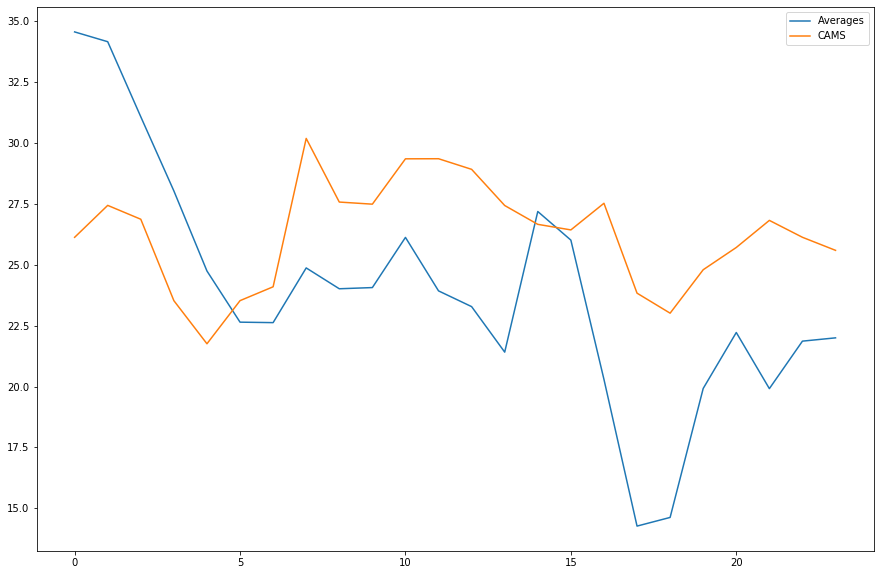

In [60]:
import matplotlib.pyplot as plt

cams = [ # 7822
    26.126539,
    27.438032,
    26.868723,
    23.525843,
    21.756285,
    23.527143,
    24.095755,
    30.187014,
    27.574444,
    27.487867,
    29.349567,
    29.353422,
    28.917675,
    27.432873,
    26.659250,
    26.430775,
    27.524464,
    23.834282,
    23.012489,
    24.795517,
    25.709595,
    26.821859,
    26.128000,
    25.591894
]

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(0, 24), averages, label='Averages')
ax.plot(range(0, 24), cams, label='CAMS')
ax.legend(loc='upper right')
plt.show()

In [65]:
import numpy as np

np_avg = np.array(averages)
np_cams = np.array(cams)

r = np.corrcoef(np_avg, np_cams)
print(r[0, 1])

r

0.2818826826728564


array([[1.        , 0.28188268],
       [0.28188268, 1.        ]])